# Import Libraries and packages

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

# Load dataset

In [2]:
df_ord = pd.read_csv('./order_30.csv')
df_ord_prod =pd.read_csv('./ord_det_30.csv')
df_prod = pd.read_csv('./products.csv')

In [3]:
df_merge = pd.merge(df_ord_prod,df_prod,on='product_id')

In [4]:
df_merge1 =pd.merge(df_merge,df_ord,on='order_id')

In [5]:
 df_merge1.head()

,order_id,product_id,add_to_cart_number,re_order_num,product_name,aisle_id,department_id,user_id,ord_feq,order_dow,order_hour_of_day,order_number
0,37,35561,1,0,Organic Tortilla Chips,107,19,52564,NaN,4,17,1
1,37,33059,2,0,Ice Peppermint Gum,46,19,52564,NaN,4,17,1
2,37,43721,3,0,Wint-O-Green,46,19,52564,NaN,4,17,1
3,306,35561,1,1,Organic Tortilla Chips,107,19,166655,10.0,2,14,33
4,306,45767,13,1,Sunny Days Strawberry Snack Bars,92,18,166655,10.0,2,14,33


# Using smaller dataset

In [12]:
# df_small = df_merge1[df_merge1['user_id'] <50000]

In [6]:
df_small =df_merge1

In [8]:
df = df_small[['order_id','product_name']]

In [9]:
df.head()

,order_id,product_name
0,37,Organic Tortilla Chips
1,37,Ice Peppermint Gum
2,37,Wint-O-Green
3,306,Organic Tortilla Chips
4,306,Sunny Days Strawberry Snack Bars


# Modeling

In [10]:
ls_ord_prod =[]
for x  in df.order_id.unique():
    ls_prd =[]
    y =df[df['order_id'] ==x]
    z = y.shape[0]
    for i in range(0, z):
        result = y.values[i,1]
        ls_prd.append(result)
    ls_ord_prod.append(ls_prd)


In [107]:
len(ls_ord_prod)

938375

In [108]:
association_rules = apriori(ls_ord_prod, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=3)  
association_results = list(association_rules)

In [109]:
association_rules1 = apriori(ls_ord_prod, min_support=0.004, min_confidence=0.2, min_lift=3, min_length=3)  
association_results1 = list(association_rules1)

In [194]:
association_rules3 = apriori(ls_ord_prod, min_support=0.004, min_confidence=0.2)  
association_results3 = list(association_rules3)

In [196]:
for item in association_results3:

    
    pair = item[0] 
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])

    
    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 100% Whole Wheat Bread -> Bag of Organic Bananas
Support: 0.004375649393899028
Confidence: 0.2262383602402336
Lift: 1.6750810434946835
Rule: Banana -> 100% Whole Wheat Bread
Support: 0.004484347941920874
Confidence: 0.23185850460080448
Lift: 1.4999980989250374
Rule: Apple Honeycrisp Organic -> Bag of Organic Bananas
Support: 0.009252164646330092
Confidence: 0.2872551614610905
Lift: 2.1268527366381886
Rule: Apple Honeycrisp Organic -> Banana
Support: 0.007093113094445184
Confidence: 0.220222339862361
Lift: 1.4247184579366896
Rule: Apple Honeycrisp Organic -> Organic Strawberries
Support: 0.006477154655654722
Confidence: 0.20109846479618843
Lift: 2.0411436534285547
Rule: Asparagus -> Banana
Support: 0.004791261489276675
Confidence: 0.23104989978930057
Lift: 1.494766866703792
Rule: Fresh Cauliflower -> Bag of Organic Bananas
Support: 0.005050219794858132
Confidence: 0.21416305133767172
Lift: 1.5856748039182225
Rule: Organic Baby Carrots -> Bag of Organic Bananas
Support: 0.005409351

In [113]:
association_results1[1]

RelationRecord(items=frozenset({'Limes', 'Organic Cilantro'}), support=0.005666178233648594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Organic Cilantro'}), items_add=frozenset({'Limes'}), confidence=0.25169230769230766, lift=5.63195748833387)])

In [191]:
for item in association_results:

    
    pair = item[0] 
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])

    
    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Limes -> Bunched Cilantro
Support: 0.0034815505528173704
Confidence: 0.27403120281831905
Lift: 6.131820630118279
Rule: Icelandic Style Skyr Blueberry Non-fat Yogurt -> Non Fat Raspberry Yogurt
Support: 0.0030861862261888904
Confidence: 0.4274538745387454
Lift: 67.66397259114292
Rule: Jalapeno Peppers -> Limes
Support: 0.0032907952577594245
Confidence: 0.27900252981568485
Lift: 6.243060828781792
Rule: Lime Sparkling Water -> Sparkling Lemon Water
Support: 0.0034421206873584656
Confidence: 0.2292405961674947
Lift: 20.446121512087522
Rule: Sparkling Water Grapefruit -> Lime Sparkling Water
Support: 0.005033169042227254
Confidence: 0.3352022711142654
Lift: 13.606671763500836
Rule: Limes -> Organic Cilantro
Support: 0.005666178233648594
Confidence: 0.25169230769230766
Lift: 5.63195748833387
Rule: Organic Garlic -> Organic Ginger Root
Support: 0.0037032103370187824
Confidence: 0.20790953691516095
Lift: 5.550099900511042
Rule: Organic Garlic -> Organic Yellow Onion
Support: 0.0077740775

In [192]:
for item in association_results1:

    
    pair = item[0] 
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])

    
    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Sparkling Water Grapefruit -> Lime Sparkling Water
Support: 0.005033169042227254
Confidence: 0.3352022711142654
Lift: 13.606671763500836
Rule: Limes -> Organic Cilantro
Support: 0.005666178233648594
Confidence: 0.25169230769230766
Lift: 5.63195748833387
Rule: Organic Garlic -> Organic Yellow Onion
Support: 0.007774077527640868
Confidence: 0.20752730996813837
Lift: 5.2599313802596175
Rule: Organic Hass Avocado -> Organic Lemon
Support: 0.00799786865592114
Confidence: 0.25574183875144824
Lift: 3.238401564515083
Rule: Total 2% with Strawberry Lowfat Greek Strained Yogurt -> Total 2% Lowfat Greek Strained Yogurt With Blueberry
Support: 0.004113494072199281
Confidence: 0.499611700750712
Lift: 43.51834490782041
Rule: Organic Hass Avocado -> Organic Baby Spinach
Support: 0.004578127081390702
Confidence: 0.26270409099247843
Lift: 3.3265630036443823
Rule: Organic Raspberries -> Organic Hass Avocado
Support: 0.004769948048488078
Confidence: 0.295289616044333
Lift: 3.739186201411524
Rule: O

In [13]:
for item in association_results:

    
    pair = item[0] 
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])

    
    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Limes -> Bunched Cilantro
Support: 0.0034815505528173704
Confidence: 0.27403120281831905
Lift: 6.131820630118279
Rule: Icelandic Style Skyr Blueberry Non-fat Yogurt -> Non Fat Raspberry Yogurt
Support: 0.0030861862261888904
Confidence: 0.4274538745387454
Lift: 67.66397259114292
Rule: Jalapeno Peppers -> Limes
Support: 0.0032907952577594245
Confidence: 0.27900252981568485
Lift: 6.243060828781792
Rule: Lime Sparkling Water -> Sparkling Lemon Water
Support: 0.0034421206873584656
Confidence: 0.2292405961674947
Lift: 20.446121512087522
Rule: Sparkling Water Grapefruit -> Lime Sparkling Water
Support: 0.005033169042227254
Confidence: 0.3352022711142654
Lift: 13.606671763500836
Rule: Limes -> Organic Cilantro
Support: 0.005666178233648594
Confidence: 0.25169230769230766
Lift: 5.63195748833387
Rule: Organic Garlic -> Organic Ginger Root
Support: 0.0037032103370187824
Confidence: 0.20790953691516095
Lift: 5.550099900511042
Rule: Organic Garlic -> Organic Yellow Onion
Support: 0.0077740775

In [1]:
plt.style.use('ggplot')
figsize=(9,12)
 

df=pd.DataFrame(association_results1)

print(df.iloc[0:20][['items','support']]) 
    
df=df.iloc[0:20][['items','support']]
 
def simple_bar_chart(support,products):
    labels=np.array(products)
#     labels=np.array(str(products).replace('frozenset',''))
    colors = ['#008000','#808000','#FFFF00','#000000','#FF0000','#00FF00','#0000FF','#008080','#aa22ff','#aa22ff','#dd0022','#ff00cc','#eeaa22','#22bbaa','#C0C0C0']
    y_pos = np.arange(len(labels))
    x_pos = np.array(support)
    plt.barh(y_pos, x_pos, color=colors, align='center' ,edgecolor='green')
    plt.yticks(y_pos, labels)
    plt.ylabel('Products',fontsize=18)
    plt.xlabel('Support',fontsize=18)
    plt.title('Consumer Buying Behaviour\n',fontsize=20)
    plt.show()
    
support=df.iloc[0:20]['support']*100
products=df.iloc[0:20]['items']
simple_bar_chart(support,products)

NameError: name 'plt' is not defined

                                                items   support
0                           (Limes, Bunched Cilantro)  0.003482
1   (Icelandic Style Skyr Blueberry Non-fat Yogurt...  0.003086
2                           (Jalapeno Peppers, Limes)  0.003291
3       (Lime Sparkling Water, Sparkling Lemon Water)  0.003442
4   (Sparkling Water Grapefruit, Lime Sparkling Wa...  0.005033
5                           (Limes, Organic Cilantro)  0.005666
6               (Organic Garlic, Organic Ginger Root)  0.003703
7              (Organic Garlic, Organic Yellow Onion)  0.007774
8               (Organic Hass Avocado, Organic Lemon)  0.007998
9      (Organic Yellow Peaches, Organic Strawberries)  0.003345
10                        (Strawberries, Raspberries)  0.003811
11  (Sparkling Water Grapefruit, Sparkling Lemon W...  0.003764
12  (Total 2% with Strawberry Lowfat Greek Straine...  0.004113
13  (Total 2% with Strawberry Lowfat Greek Straine...  0.003444
14  (Organic Hass Avocado, Organic Baby 

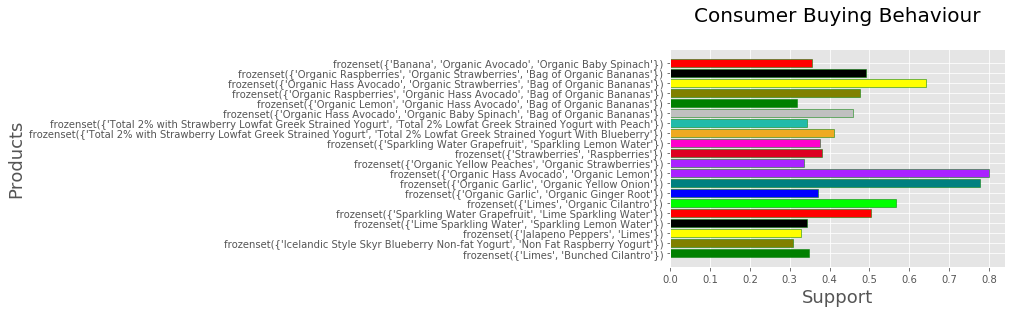

In [81]:

plt.style.use('ggplot')
figsize=(9,12)
 

df=pd.DataFrame(association_results)

print(df.iloc[0:20][['items','support']]) 
    
df=df.iloc[0:20][['items','support']]
 
def simple_bar_chart(support,products):
    labels=np.array(products)
#     labels=np.array(str(products).replace('frozenset',''))
    colors = ['#008000','#808000','#FFFF00','#000000','#FF0000','#00FF00','#0000FF','#008080','#aa22ff','#aa22ff','#dd0022','#ff00cc','#eeaa22','#22bbaa','#C0C0C0']
    y_pos = np.arange(len(labels))
    x_pos = np.array(support)
    plt.barh(y_pos, x_pos, color=colors, align='center' ,edgecolor='green')
    plt.yticks(y_pos, labels)
    plt.ylabel('Products',fontsize=18)
    plt.xlabel('Support',fontsize=18)
    plt.title('Consumer Buying Behaviour\n',fontsize=20)
    plt.show()
    
support=df.iloc[0:20]['support']*100
products=df.iloc[0:20]['items']
simple_bar_chart(support,products)